# Cleaning the World Happiness Data Set
source: https://www.kaggle.com/unsdsn/world-happiness/version/2

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
happiness_2015 = pd.read_csv('2015.csv')
happiness_2016 = pd.read_csv('2016.csv')
happiness_2017 = pd.read_csv('2017.csv')

In [3]:
happiness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

## Aggregating Data

In [5]:
regions = happiness_2015['Region'].unique()

mean_happiness = {}

for region in regions:
    region_group = happiness_2015[happiness_2015['Region'] == region]['Happiness Score']
    region_mean = region_group.mean()
    mean_happiness[region] = region_mean

In [6]:
mean_happiness    

{'Australia and New Zealand': 7.285,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Latin America and Caribbean': 6.144681818181818,
 'Middle East and Northern Africa': 5.406899999999999,
 'North America': 7.273,
 'Southeastern Asia': 5.317444444444445,
 'Southern Asia': 4.580857142857143,
 'Sub-Saharan Africa': 4.202800000000001,
 'Western Europe': 6.689619047619048}

In [7]:
grouped = happiness_2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')

In [8]:
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [9]:
na_group = grouped.get_group('North America')
north_america = happiness_2015.iloc[[4, 14]]
equal = north_america == na_group

In [10]:
na_group

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [11]:
means = grouped.mean()
means

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [12]:
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [13]:
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())

happy_mean_max = happy_grouped.agg([np.mean, np.max])

mean_max_dif = happy_grouped.agg(dif)
mean_max_dif

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

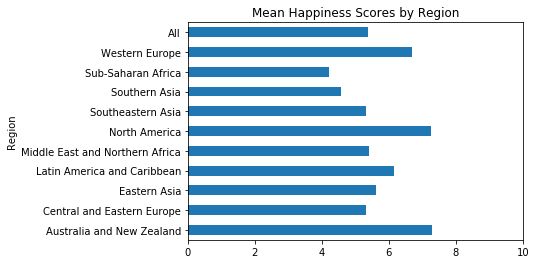

In [14]:
pv_happiness = happiness_2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)

pv_happiness.plot(kind='barh',
                 xlim=(0,10),
                 title='Mean Happiness Scores by Region',
                 legend=False)

world_mean_happiness=happiness_2015['Happiness Score'].mean()

In [15]:
grouped = happiness_2015.groupby('Region')['Happiness Score', 'Family']
happy_family_stats = grouped.agg([np.min, np.max, np.mean])

pv_happy_family_stats = happiness_2015.pivot_table(['Happiness Score',
                                                   'Family'],
                                                  'Region',
                                                  aggfunc=
                                                  [np.min, np.max, np.mean],
                                                  margins=True)
pv_happy_family_stats

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

## Combining Data Sets

In [16]:
happiness_2015['Year'] = 2015
happiness_2016['Year'] = 2016
happiness_2017['Year'] = 2017

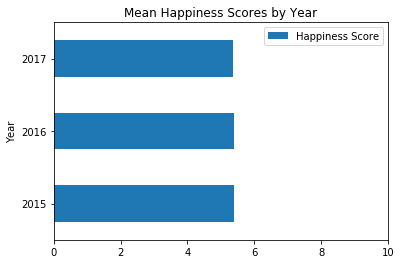

In [17]:
happiness_2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)

combined = pd.concat([happiness_2015, happiness_2016, happiness_2017],axis=0, sort=True)

pivot_table_combined = combined.pivot_table(['Happiness Score'],'Year')

pivot_table_combined.plot(kind='barh',
                          title='Mean Happiness Scores by Year',
                          xlim = (0,10)
                         )

## Transforming Data

In [18]:
mapping = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }
happiness_2015 = happiness_2015.rename(mapping, axis=1)

In [19]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

economy_impact_map = happiness_2015['Economy'].map(label)
economy_impact_apply = happiness_2015['Economy'].apply(label)

equal = economy_impact_apply == economy_impact_map

economy_impact_map.value_counts()

Low     92
High    66
Name: Economy, dtype: int64

In [20]:
def label(element,x):
    if element > x:
        return 'High'
    else:
        return 'Low'

economy_impact_apply = happiness_2015['Economy'].apply(label, x = 0.8)
economy_impact_apply.value_counts()

High    93
Low     65
Name: Economy, dtype: int64

In [21]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness_2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

factors_impact = happiness_2015[factors].applymap(label)

factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


In [22]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    
    return num / den

v_counts_pct = factors_impact.apply(v_counts)
v_counts_pct

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


In [23]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

def percentages(col):
    div = col / happiness_2015['Happiness Score']
    return div * 100

factor_percentages = happiness_2015[factors].apply(percentages)
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,18.406617,17.787136,12.408462,8.772506,5.532885,3.911691,33.180177
1,17.224177,18.545563,12.535908,8.315963,1.870784,5.770401,35.736146
2,17.609672,18.075993,11.620035,8.627342,6.424472,4.535539,33.108011
3,19.396437,17.694097,11.768280,8.903616,4.852832,4.613002,32.774661
4,17.857681,17.808132,12.193753,8.522553,4.437458,6.168170,33.011445


In [24]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

melt = pd.melt(happiness_2015, id_vars=main_cols, value_vars=factors)

melt['Percentage'] = round(melt['value'] / melt['Happiness Score'] * 100,2)
melt.head()

,Country,Region,Happiness Rank,Happiness Score,variable,value,Percentage
0,Switzerland,Western Europe,1,7.587,Economy,1.39651,18.41
1,Iceland,Western Europe,2,7.561,Economy,1.30232,17.22
2,Denmark,Western Europe,3,7.527,Economy,1.32548,17.61
3,Norway,Western Europe,4,7.522,Economy,1.45900,19.40
4,Canada,North America,5,7.427,Economy,1.32629,17.86


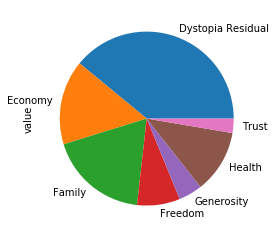

In [25]:
melt = pd.melt(happiness_2015, 
               id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], 
               value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

pv_melt = pd.pivot_table(melt, index = 'variable', values = 'value')

pv_melt.plot(kind = 'pie',
             y = 'value',
             legend = False)

## Vectorized Strings

In [26]:
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

merged = pd.merge(left=happiness_2015, right=world_dev,
         how='left',
         left_on='Country',
         right_on='ShortName')

merged = merged.rename(col_renaming, axis=1)
merged.head()
merged.columns

Index(['Country', 'Region_x', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual', 'Year', 'CountryCode', 'ShortName',
       'TableName', 'LongName', 'Alpha2Code', 'CurrencyUnit', 'SpecialNotes',
       'Region_y', 'IncomeGroup', 'Wb2Code', 'NationalAccountsBaseYear',
       'NationalAccountsReferenceYear', 'SnaPriceValuation', 'LendingCategory',
       'OtherGroups', 'SystemOfNationalAccounts',
       'AlternativeConversionFactor', 'PppSurveyYear',
       'BalanceOfPaymentsManualInUse', 'ExternalDebtReportingStatus',
       'SystemOfTrade', 'GovernmentAccountingConcept',
       'ImfDataDisseminationStandard', 'LatestPopulationCensus',
       'LatestHouseholdSurvey', 'IESurvey', 'VitalRegistrationComplete',
       'LatestAgriculturalCensus', 'LatestIndustrialData', 'LatestTradeData',
       'LatestWaterWithdrawalData'],
      dtype='object')

In [27]:
def extract_last_word(element):
    words = str(element).split()
    return words[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

In [28]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

In [29]:
lengths = merged['CurrencyUnit'].str.len()

value_counts = lengths.value_counts(dropna=False)

value_counts

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

In [30]:
pattern = r"[Nn]ational accounts"

national_accounts = merged['SpecialNotes'].str.contains(pattern)
national_accounts.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

In [31]:
pattern = r"[Nn]ational accounts"

national_accounts = merged['SpecialNotes'].str.contains(pattern, na = False)

merged_national_accounts = merged[national_accounts]

merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


In [32]:
pattern =r"([1-2][0-9]{3})"

years = merged['SpecialNotes'].str.extract(pattern)
years.head(10)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,1999
6,1999
7,NaN
8,NaN
9,1990


In [33]:
pattern = r"([1-2][0-9]{3})"

years = merged['SpecialNotes'].str.extract(pattern, expand=True)
years.head(10)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,1999
6,1999
7,NaN
8,NaN
9,1990


In [34]:
pattern = r"(?P<Years>[1-2][0-9]{3})"

years = merged['IESurvey'].str.extractall(pattern)

value_counts = years['Years'].value_counts()

print(value_counts)

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
1998     1
1992     1
2006     1
2000     1
1999     1
1995     1
2002     1
2003     1
Name: Years, dtype: int64


In [35]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"

years = merged['IESurvey'].str.extractall(pattern)

first_two_year = years['First_Year'].str[:2]
years['Second_Year'] = first_two_year + years['Second_Year']
years.head(10)

,,First_Year,Second_Year
,match,,
0,0,2004,NaN
1,0,2010,NaN
2,0,2010,NaN
3,0,2010,NaN
4,0,2010,NaN
5,0,2010,NaN
6,0,2010,NaN
7,0,2005,NaN
9,0,2003,NaN


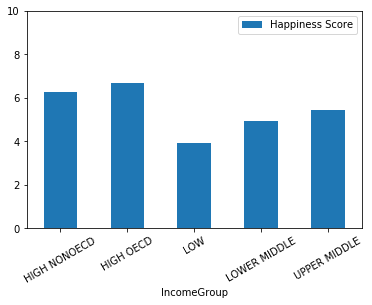

In [36]:
no_income = merged['IncomeGroup'].str.replace(' income','').str.replace(':','').str.strip()
upper = no_income.str.upper()

merged['IncomeGroup'] = upper

pv_incomes = merged.pivot_table(index = 'IncomeGroup', values = 'Happiness Score')

pv_incomes.plot(kind='bar',
                rot = 30,
                ylim = (0,10)) 